In [1]:
import sympy
import pandas as pd
from tqdm import tqdm

from symxplorer.symbolic_solver.domains import ExperimentResult
from symxplorer.designer_tools.visualizer import Visualizer

# Load the Past Run Results

In [2]:
results = ExperimentResult("VLSI_CMMF_POST_EXPERIMENT")
dir_of_results = results.find_results_file("Runs/VLSI_CMMF_Automated_NA")
results = results.load(f"{dir_of_results[0]}/results.pkl")

In [3]:
classifications_of_intrest = results.classifications_dict["Z1_Z2_Z3_Z4_Z5_Z6"]
len(classifications_of_intrest), classifications_of_intrest[0]

(4096,
 FilterClassification(False, X-INVALID-ORDER, None)(R_1, R_2, R_3, R_4, R_5, R_6), R_1*R_2*R_4*R_6/(R_1*R_4*R_5 - R_2*R_3*R_4 + R_2*R_3*R_5 + R_2*R_4*R_5 + R_3*R_4*R_5))

In [4]:
classifications_of_intrest = []

for key in results.classifications_dict.keys():
    classifications = results.classifications_dict[key]

    classifications_of_intrest += ([classification 
                                for classification in classifications 
                                if (classification.fType in ["X-INVALID-ORDER"] )]
                                )
    
    fTypes = set(classification.fType for classification in classifications_of_intrest)

len(classifications_of_intrest), fTypes

(3190, {'X-INVALID-ORDER'})

# Visulization

## Using Only TF

In [5]:
idx = 2365
tf = classifications_of_intrest[idx].transferFunc
classifications_of_intrest[idx].zCombo

(R_1/(C_1*R_1*s + 1), R_2, R_3, 1/(C_4*s), R_5, R_6/(C_6*R_6*s + 1))

In [6]:
viz = Visualizer(tf=tf)
print(viz.is_defined_numerically())
viz.get_parameters()


False


['C_1', 'C_4', 'C_6', 'R_1', 'R_2', 'R_3', 'R_5', 'R_6']

In [7]:
viz.tf

R_1*R_2*R_6/(C_1*C_4*C_6*R_1*R_2*R_3*R_5*R_6*s**3 + R_1*R_5 - R_2*R_3 + R_2*R_5 + R_3*R_5 + s**2*(C_1*C_4*R_1*R_2*R_3*R_5 - C_1*C_6*R_1*R_2*R_3*R_6 + C_1*C_6*R_1*R_2*R_5*R_6 + C_1*C_6*R_1*R_3*R_5*R_6 + C_4*C_6*R_2*R_3*R_5*R_6) + s*(-C_1*R_1*R_2*R_3 + C_1*R_1*R_2*R_5 + C_1*R_1*R_3*R_5 + C_4*R_2*R_3*R_5 + C_6*R_1*R_5*R_6 - C_6*R_2*R_3*R_6 + C_6*R_2*R_5*R_6 + C_6*R_3*R_5*R_6))

In [8]:
viz.tf.subs({sympy.symbols("s") : 0})

R_1*R_2*R_6/(R_1*R_5 - R_2*R_3 + R_2*R_5 + R_3*R_5)

In [9]:
# viz.set_equal_c()

In [10]:
# viz.get_parameters()

In [11]:
# viz.set_equal_r()

In [12]:
viz.get_parameters()

['C_1', 'C_4', 'C_6', 'R_1', 'R_2', 'R_3', 'R_5', 'R_6']

In [13]:
viz.set_params({
    "R_1": 2e3, 
    "R_2": 2e3,
    "R_3": 1e3,
    "R_5": 1e3,
    "R_6": 2e3, 
    "C_1": 5e-12,
    "C_4": 5e-12,
    "C_6": 5e-12
})

{s: 2*I*pi*f,
 R_1: 2000.0,
 R_2: 2000.0,
 R_3: 1000.0,
 R_5: 1000.0,
 R_6: 2000.0,
 C_1: 5e-12,
 C_4: 5e-12,
 C_6: 5e-12}

In [14]:
viz.eval_freq(17.5e6)

(1897.84963791361, -98.55523889701577)

In [15]:
viz.eval_freq(0)

(2666.666666666667, 0.0)

Calculating Phases: 100%|██████████| 100/100 [00:00<00:00, 110.44it/s]


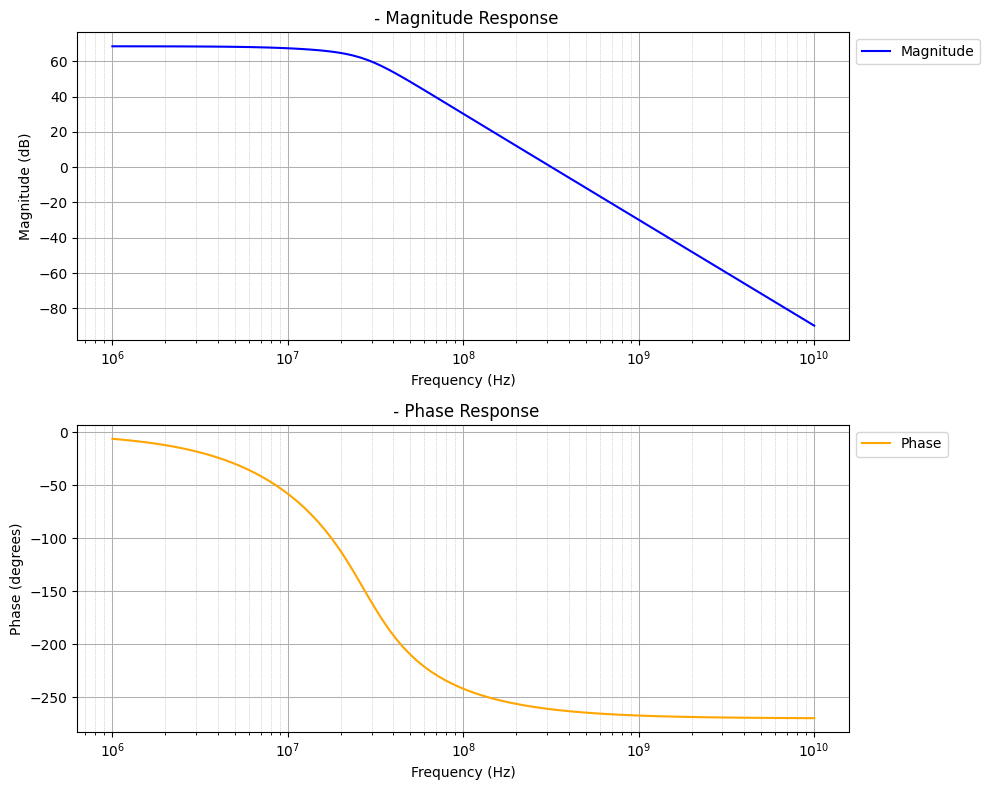

In [16]:
viz.visualize(start_freq_order=6, end_freq_order=10,num_of_points=100)

## Using Filter_Classification Class

In [15]:
idx = 1
viz = Visualizer(filter_classification=classifications_of_intrest[idx])

In [ ]:
viz.set_equal_c()
viz.set_equal_r()
viz.set_params({
    "R" : 1e3,
    "C" : 1e-9
})
viz.eval_filter_parameter("Q")

In [ ]:
viz.tf_original

In [ ]:
viz.tf

In [ ]:
viz.visualize(end_freq_order=10)

In [ ]:
viz.eval_filter_parameter("Q")

In [ ]:
viz.eval_filter_parameter("wo")[1] / (2*3.14)